<a href="https://colab.research.google.com/github/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/blob/main/Proyecto_EntregaPlus_Comision61190_RodriguezCastilloLeonardo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Presentacion de Proyecto ENTREGA PLUS**

## **1.- Hipótesis.**
***Primer Hipóteseis***: La zona geográfica donde se envían los
pedidos influye en nuestros indicadores de:
* Puntualidad de Entrega de Pedidos
* Efectividad de Entrega de Pedidos

Con lo cual entendemos que sabiendo donde debemos entregar cada uo de ellos, podemos establecer una probabilidad de NO ENTREGA, que nos va a permitir tomar acciones para que cada pedido con baja probalidad de entrega, sea finalmente entregado en su primer visita

***Segunda Hipóteseis***: Los proveedores logísticos pueden ser más fuertes en una zona que en otra

## **2. - Objetivo y alcance.**
El Objetivo del proyecto es poder crear un modelo que pueda identificar para cada pedido, si el mismo se va a entregar o no en la primer visita que realice nuestro proveedor logístico.

# **Data Acquisition**

## **Metadata**

**1.- Descripción de los datos.**

El set de datos es acerca de pedidos de la empresa EPSILON S.A., los cuales hacen referencia a los detalles para la entrega de los mismos a nuestros clientes.

**2.- Detalles generales del dataset**
* Cantidad de Registros: 190152
* Volumen de Crecimiento Estimado Diario: 5000
* Datos del año 2024

**3.- Diccionario de datos.**

| Columna | Tipo de Dato |
|---------|--------------|
| Entrega |  int64 |
| Fecha Pedido | datetime64 |
| Distribuidor | category |
| Distribuidor Sigla | category |
| Tipo de Distribución Comercial | category |
| Codigo Postal | int64 |
| Id Provincia | int64 |
| Provincia | category |
| Localidad | category |
| Departamento |category |
| Aglomerado |category |
| Id Zona Logistica | int64 |
| Zona Logistica |category |
| Zona E-Commerce |category |
| Periodo |category |
| Año | int64 |
| Mes Sigla |category |
| Mes Nombre |category |
| Mes Numero | int64 |
| Trimestre Sigla |category |
| Trimestre Nombre |category |
| Trimestre Numero | int64 |
| Semestre | int64 |
| Año Semana |category |
| Dia Semana Sigla |category |
| Dia Semana Numero | int64 |
| Dia Semana Nombre |category |
| Hora Pedido | int64 |
| Visita 1 Fecha | datetime64[ns] |
| Visita 1 Hora | object |
| ID Visita 1 Motivo |category |
| Visita 1 Motivo |category |
| Dias Primer Visita | int64 |
| Flag Visita 1 Puntual |category |
| Estado Visita |category |
| Estado Distribución |category |
| Calidad de la Direccion |category |
| Cantidad de Pedidos | int64 |
| Visita 1 Puntual | int64 |
| Cant. Primera Visita | int64 |
| Cant. Vis. y Ent. 1ra Visita | int64 |
| Cantidad Celulares | int64 |
| Cantidad Accesorios | int64 |
| Peso Bruto | float64 |
| Valor Total en Pesos | float64 |
| Valor Total en Dolares | float64 |
| Provincia Sigla | object |
| Hora Visita | int64 |

## **Importacion de Dataset**

In [ ]:
# Instalación de Librerías
!pip install dataprep
!pip install chart_studio
!pip install mglearn
!pip install gapminder
#! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

# Importación de Librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.animation as animation
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import random
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import missingno as msno
import scipy
# La Librería Scipy es exclusiva de datos estadísticos

import requests
# La librería requests en Python es una herramienta poderosa y popular que se utiliza para realizar solicitudes HTTP de manera sencilla
# y eficiente. Permite interactuar con páginas web, APIs RESTful, y otros servicios basados en HTTP
import json

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")
# La librería warnings en Python se utiliza para gestionar y controlar mensajes de advertencia (warnings) durante la ejecución de un programa.
# A diferencia de los errores, que detienen la ejecución del programa, los warnings son mensajes informativos que indican situaciones potencialmente
# problemáticas, pero permiten que el programa continúe ejecutándose

import mglearn
# La librería mglearn (abreviatura de mglearn) es una herramienta complementaria que facilita el aprendizaje y la enseñanza de Machine Learning en Python.
# Está diseñada principalmente para ilustrar conceptos básicos de aprendizaje automático de manera visual e intuitiva

import graphviz
# La librería graphviz en Python se utiliza para trabajar con Graphviz, una herramienta de visualización gráfica que permite crear y
# representar grafos dirigidos y no dirigidos. Es especialmente útil para crear diagramas jerárquicos, flujos de trabajo, árboles de decisión,
# redes de dependencias y otras estructuras gráficas

import folium  #needed for interactive map
from folium.plugins import HeatMap
# La librería folium en Python se utiliza para crear mapas interactivos de manera sencilla y visualmente atractiva. Es una herramienta ideal para trabajar
# con datos geoespaciales y visualizar información geográfica superpuesta en mapas

#from ydata_profiling import ProfileReport
from IPython.display import display
from IPython.display import HTML
# La librería IPython.display de Python es un módulo utilizado principalmente en entornos interactivos como Jupyter Notebooks. Su función es proporcionar
# herramientas para mostrar salidas de una manera más rica y flexible, como imágenes, gráficos, HTML, audio y más. Esto mejora la experiencia de visualización
# y presentación de resultados
# La librería display en Python es parte del paquete IPython.display, que proporciona funciones para mostrar objetos de manera interactiva y enriquecida
# dentro de entornos como Jupyter Notebook o Google Colab.
# Permite mostrar no solo texto, sino también imágenes, gráficos, HTML, Markdown, audio, video y otros tipos de datos de forma estructurada
# y visualmente atractiva
# La función HTML se usa para mostrar contenido HTML directamente en el cuaderno de Jupyter. Esto es especialmente útil para integrar código HTML en tus
# celdas y ver cómo se presenta sin tener que crear archivos externos.

from bokeh.io import show, output_file
# La librería bokeh.io es parte del ecosistema de Bokeh en Python, una herramienta para crear visualizaciones interactivas de alta calidad que se pueden
# integrar fácilmente en aplicaciones web o presentaciones.
# Bokeh es especialmente útil cuando se quiere trabajar con gráficos dinámicos y visualizaciones interactivas para la web, como gráficos de líneas, barras,
# dispersión, mapas, y más, todo en tiempo real.
# Las funciones show y output_file provienen de la librería Bokeh, que se utiliza para crear visualizaciones interactivas en Python. Estas funciones son
# clave para mostrar los gráficos creados con Bokeh, ya sea en un navegador web o como parte de un archivo HTML

from bokeh.plotting import figure
# La librería bokeh.plotting de Bokeh en Python se utiliza para crear visualizaciones interactivas y dinámicas en el navegador web. Permite generar gráficos
# y visualizaciones atractivas que los usuarios pueden explorar de manera interactiva, como hacer zoom, mover, o seleccionar puntos en los gráficos.
# Bokeh es especialmente útil para proyectos que requieren visualización web o dashboard interactivo.
# La función figure de la librería Bokeh en Python es el núcleo para crear gráficos interactivos y personalizados. Bokeh es una biblioteca poderosa para
# la visualización de datos, y la función figure actúa como un lienzo donde puedes agregar elementos visuales, como gráficos de líneas, barras, puntos, etc.

from bokeh.models import DatetimeTickFormatter
# bokeh.models contiene modelos que proporcionan herramientas, widgets y componentes que puedes utilizar para personalizar y mejorar las visualizaciones
# en Bokeh.
# Estos modelos permiten añadir interactividad, controlar las propiedades visuales de los elementos gráficos, y configurar la forma en que los gráficos
# responden a las acciones del usuario.

from mlxtend.plotting import plot_decision_regions
# La librería mlxtend.plotting es parte de mlxtend (machine learning extensions), una biblioteca de Python que proporciona herramientas adicionales para el
# análisis y visualización de datos, especialmente orientadas a machine learning y análisis exploratorio. La sublibrería mlxtend.plotting está diseñada para
# facilitar la visualización de resultados y modelos de aprendizaje automático, creando gráficos que son útiles tanto para la interpretación de modelos como
# para la presentación de resultados

from dataprep.eda import create_report
# La librería dataprep.eda es parte de la biblioteca dataprep en Python y está diseñada para facilitar el proceso de exploración y análisis de datos. Es una
# herramienta muy útil para realizar un análisis exploratorio de datos (EDA) de manera rápida y eficiente, sin necesidad de escribir mucho código.
# dataprep.eda automatiza muchas tareas comunes en la exploración de datos y te permite obtener información valiosa sobre tu conjunto de datos con poco esfuerzo

from gapminder import gapminder
# Gapminder es una biblioteca utilizada para trabajar con el conjunto de datos Gapminder, que contiene información socioeconómica y de salud
# de varios países a lo largo del tiempo. Este conjunto de datos es muy popular en análisis de datos, visualización y aprendizaje de estadísticas.

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, neighbors
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import make_blobs

In [ ]:
# Configuración de Enlaces de los Datasets del Proyecto en Github
URL1 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_1_Pedidos_61190.xlsx'
URL2 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_2_Pedidos_61190.xlsx'
URL3 = 'https://github.com/Leonardo-rodcas/Proyecto-DS-61190-E-Commerce/raw/refs/heads/main/2024_3_Pedidos_61190.xlsx'

In [ ]:
# Cremos Dataframes con los enlaces anteriores
# A todos los campos los importo como String, para luego convertir particularmente los que no lo sean
df_2024_Sem_1 = pd.read_excel(URL1, dtype='str')
df_2024_Sem_2 = pd.read_excel(URL2, dtype='str')
df_2024_Sem_3 = pd.read_excel(URL3, dtype='str')

In [ ]:
# Validamos que todas las columnas del primer dataframe sea String
df_2024_Sem_1.info()

In [ ]:
# Validamos que todas las columnas del segundo dataframe sea String
df_2024_Sem_2.info()

In [ ]:
# Validamos que todas las columnas del tercer dataframe sea String
df_2024_Sem_3.info()

In [ ]:
# Creamos Dataframe Auxiliar con datos de Provicias
URL3 = 'https://infra.datos.gob.ar/georef/provincias.json'
response = requests.get(URL3)
datos_json = json.loads(response.text)
df_prov = pd.DataFrame.from_dict(datos_json['provincias'])

# Renombramos la columna "Id" a "Id Provincia"
df_prov = df_prov.rename(columns={'id': 'Id Provincia'})

# Agregamos la columna "Sigla Provincia" y le aportamos un valor a cada una
df_prov['Provincia Sigla']=""
df_prov.loc[df_prov['Id Provincia'] == '02', 'Provincia Sigla'] = 'CABA'
df_prov.loc[df_prov['Id Provincia'] == '06', 'Provincia Sigla'] = 'BSAS'
df_prov.loc[df_prov['Id Provincia'] == '10', 'Provincia Sigla'] = 'CATA'
df_prov.loc[df_prov['Id Provincia'] == '14', 'Provincia Sigla'] = 'CORD'
df_prov.loc[df_prov['Id Provincia'] == '18', 'Provincia Sigla'] = 'CTES'
df_prov.loc[df_prov['Id Provincia'] == '22', 'Provincia Sigla'] = 'CHAC'
df_prov.loc[df_prov['Id Provincia'] == '26', 'Provincia Sigla'] = 'CHUB'
df_prov.loc[df_prov['Id Provincia'] == '30', 'Provincia Sigla'] = 'ERIO'
df_prov.loc[df_prov['Id Provincia'] == '34', 'Provincia Sigla'] = 'FORM'
df_prov.loc[df_prov['Id Provincia'] == '38', 'Provincia Sigla'] = 'JUJU'
df_prov.loc[df_prov['Id Provincia'] == '42', 'Provincia Sigla'] = 'PAMP'
df_prov.loc[df_prov['Id Provincia'] == '46', 'Provincia Sigla'] = 'RIOJ'
df_prov.loc[df_prov['Id Provincia'] == '50', 'Provincia Sigla'] = 'MEND'
df_prov.loc[df_prov['Id Provincia'] == '54', 'Provincia Sigla'] = 'MISI'
df_prov.loc[df_prov['Id Provincia'] == '58', 'Provincia Sigla'] = 'NEUQ'
df_prov.loc[df_prov['Id Provincia'] == '62', 'Provincia Sigla'] = 'RNEG'
df_prov.loc[df_prov['Id Provincia'] == '66', 'Provincia Sigla'] = 'SALT'
df_prov.loc[df_prov['Id Provincia'] == '70', 'Provincia Sigla'] = 'SJUA'
df_prov.loc[df_prov['Id Provincia'] == '74', 'Provincia Sigla'] = 'SLUI'
df_prov.loc[df_prov['Id Provincia'] == '78', 'Provincia Sigla'] = 'SCRU'
df_prov.loc[df_prov['Id Provincia'] == '82', 'Provincia Sigla'] = 'SAFE'
df_prov.loc[df_prov['Id Provincia'] == '86', 'Provincia Sigla'] = 'SEST'
df_prov.loc[df_prov['Id Provincia'] == '90', 'Provincia Sigla'] = 'TUCU'
df_prov.loc[df_prov['Id Provincia'] == '94', 'Provincia Sigla'] = 'TFUE'

# Mostramos resultado
df_prov.head(5)

# **Data Wrangling**

## **Concatenado de Dataframes**

In [ ]:
# Concatenamos los 3 Dataframes del año 2024
frames = [df_2024_Sem_1, df_2024_Sem_2, df_2024_Sem_3]
df_concat = pd.concat(frames)

## **Merge de Dataframes**

In [ ]:
# Hacemos Merge entre el Dataframe principal y el de provicias para agregar la columna Sigla de la provincia
df = pd.merge(df_concat, df_prov, left_on = "Id Provincia", right_on = "Id Provincia", how = 'left')
df.shape

## **Registros en NaN**

In [ ]:
# Buscamos registros NaN en los campos geográficos para que quede constancia de los mismos
df_geo = df[['Entrega','Codigo Postal','Provincia','Provincia Sigla']]
df_geo.loc[df_geo['Provincia Sigla'].isna()]

In [ ]:
# Borramos registros NaN en todo lo referente a los datos geográficos del Dataframe principal
df = df.dropna(subset=['Provincia Sigla'])
df.shape

In [ ]:
# Buscamos los casos que no tienen visitas
df_sin_visita = df[['Entrega','Visita 1 Fecha','Estado Visita']]
df_sin_visita.loc[df_sin_visita['Visita 1 Fecha'].isna()]

In [ ]:
# Borramos registros NaN en todo lo referente a la Primer Visita
df = df.dropna(subset=['Visita 1 Fecha'])
df.shape

## **Cambio del tipo de datos de las columnas**

In [ ]:
# Cambiamos el tipo de datos de las columnas que corresponda
df = df.astype({
    'Entrega': 'int64',
    'Distribuidor': 'category',
    'Distribuidor Sigla': 'category',
    'Centro': 'category',
    'Centro Sigla': 'category',
    'Centro Tipo': 'category',
    'Tipo de Distribución Comercial': 'category',
    'Codigo Postal': 'int64',
    'Id Provincia': 'int64',
    'Provincia': 'category',
    'Localidad': 'category',
    'Departamento': 'category',
    'Aglomerado': 'category',
    'Id Zona Logistica': 'int64',
    'Zona Logistica': 'category',
    'Zona E-Commerce': 'category',
    'Periodo': 'category',
    'Año': 'int64',
    'Mes Sigla': 'category',
    'Mes Nombre': 'category',
    'Mes Numero': 'int64',
    'Trimestre Sigla': 'category',
    'Trimestre Nombre': 'category',
    'Trimestre Numero': 'int64',
    'Semestre': 'int64',
    'Año Semana': 'category',
    'Dia Semana Sigla': 'category',
    'Dia Semana Nombre': 'category',
    'Dia Semana Numero': 'int64',
    'Hora': 'int64',
    'ID Visita 1 Motivo': 'category',
    'Visita 1 Motivo': 'category',
    'Dias Primer Visita': 'int64',
    'Flag Visita 1 Puntual': 'category',
    'Estado Visita': 'category',
    'Estado Distribución': 'category',
    'Calidad de la Direccion': 'category',
    'Cantidad de Pedidos': 'int64',
    'Visita 1 Puntual': 'int64',
    'Cant. Primera Visita': 'int64',
    'Cant. Vis. y Ent. 1ra Visita': 'int64',
    'Cantidad Celulares': 'int64',
    'Cantidad Tarjetas SIMs': 'int64',
    'Cantidad Accesorios': 'int64',
    'Cantidad Accesorios IOT': 'int64',
    'Peso Bruto': 'float64',
    'Costo Total de Materiales': 'float64',
    'Valor Total USD': 'float64',
})

df['Fecha Pedido'] = pd.to_datetime(df['Fecha Pedido'])
df['Visita 1 Fecha'] = pd.to_datetime(df['Visita 1 Fecha'])

## **Renombramos las columnas**

In [ ]:
# Cambiamos nombres de las columnas que necesiten ser más claras en lo descriptivo
df = df.rename(columns={'Hora': 'Hora Pedido'})
df = df.rename(columns={'Costo Total de Materiales': 'Valor Total en Pesos'})
df = df.rename(columns={'Valor Total USD': 'Valor Total en Dolares'})
df = df.rename(columns={'Semestre': 'Semestre Numero'})

## **Creación de nuevos campos**

In [ ]:
# Creamos el campo "Hora Visita" en formato de 2 dígitos (los 2 de la izquierda del campo "Visita 1 Hora")
df['Hora Visita'] = df['Visita 1 Hora'].str.slice(0, 2)

# Cambiamos a Nan los valores Numeral ("#") del campo "Hora Visita"
df.loc[df['Hora Visita'] == '#', 'Hora Visita'] = np.nan

# Cambiamos el tipo de datos de esta nueva columna a "Int64"
df['Hora Visita'] = df['Hora Visita'].astype('Int64')

# Validamos que haya quedado correcto el cambio
df[['Entrega','Hora Visita']]

In [ ]:
# Creamos el campo "Tipo Material"
df['Tipo Material'] = np.nan  # Inicializamos la columna

df.loc[(df['Cantidad Celulares'] > 0) & (df['Cantidad Accesorios'] == 0), 'Tipo Material'] = 'Celular'
df.loc[(df['Cantidad Celulares'] == 0) & (df['Cantidad Accesorios'] > 0), 'Tipo Material'] = 'Accesorio'
df.loc[(df['Cantidad Celulares'] > 0) & (df['Cantidad Accesorios'] > 0), 'Tipo Material'] = 'Celular + Accesorio'

## **Borrado de Campos innecesarios**

In [ ]:
# Borramos las columnas que no aportan valor al Dataframe
df = df.drop(['Canal', 'Subcanal', 'Centro', 'Centro Sigla', 'Centro Tipo', 'Puesto de Expedicion', 'Visita 1 Trackeo', 'Visita 1 Transporte', 'Días contrato primera visita'], axis=1)
df = df.drop(['Cantidad Tarjetas SIMs', 'Cantidad Accesorios IOT', 'nombre', 'nombre_completo', 'fuente', 'iso_id', 'iso_nombre'], axis=1)
df = df.drop(['Latitud Provincia', 'Longitud Provincia', 'Latitud Departamento', 'Longitud Departamento', 'Latitud Localidad', 'Longitud Localidad'], axis=1)
df = df.drop(['centroide', 'categoria', 'Año', 'Cantidad de Pedidos'], axis=1)

## Definición del Índice

In [ ]:
# Indice del Dataframe Principal
df = df.set_index('Entrega')

In [ ]:
# Obtenemos algunas estadísticas del Dataset
df.describe().round().T

## **Método describe()**
En línea general se observan datos acordes sobre todo en los indicadores. Pero debemos revisar lo siguiente:
* Días Primer Visita tiene:
  * Un mínimo de -1. Estos casos no tienen visitas aún con lo cual se deberían quitar del análisis
  * Casos que van entre 10 a 62 días para la primer visita. Se debería asignar la media a todos esos casos
* Peso Bruto tiene un mínimo en 0 (cero), lo cual significa que existen algunos registros en cero
* Peso Bruto tiene un peso máximo irreal. Debemos detectar y tratar esos registros
* Valor Total en Pesos y Valor Total en Dolares tienen un mínimo en 0 (cero), lo cual significa que existen algunos registros en cero
* El campo **"Cant. Primera Visita"** se puede borrar del Dataset ya que todos los registros estadísticos del mismo han quedado con valor 1 (uno) (media, minimo, maximo, Q1, Q2, Q3)

Esto nos permite concluir que tenemos un muy buen dataset, con una alta calidad de datos

In [ ]:
# Tratamiento de Peso Bruto Mayor a 200 KG
limite_peso_maximo = 200
media_peso = df.loc[df['Peso Bruto'] < limite_peso_maximo, 'Peso Bruto'].mean()
df.loc[df['Peso Bruto'] > limite_peso_maximo, 'Peso Bruto'] = media_peso

In [ ]:
# Tratamiento de Peso Bruto = 0 (cero)
df.loc[df['Peso Bruto'] == 0, 'Peso Bruto'] = media_peso

In [ ]:
# Tratamiento de Valor Total en $ (Pesos Argentinos)
media_pesos_ar = df.loc[df['Valor Total en Pesos'] > 0, 'Valor Total en Pesos'].mean()
media_pesos_ar
df.loc[df['Valor Total en Pesos'] == 0, 'Valor Total en Pesos'] = media_pesos_ar

In [ ]:
# Tratamiento de Valor Total en u$s (Dolares)
media_dolares = df.loc[df['Valor Total en Dolares'] > 0, 'Valor Total en Dolares'].mean()
df.loc[df['Valor Total en Dolares'] == 0, 'Valor Total en Dolares'] = media_dolares

In [ ]:
# Buscamos los pedidos con más de 10 días para su primer visita
limite_dias_primer_visita_maximo = 11
df.loc[df['Dias Primer Visita'] >= limite_dias_primer_visita_maximo, ['Dias Primer Visita']]

In [ ]:
# Tratamiento de Dias Primer Visita
media_dias_primer_visita = df.loc[df['Dias Primer Visita'] < limite_dias_primer_visita_maximo, 'Dias Primer Visita'].mean()
df.loc[df['Dias Primer Visita'] >= limite_dias_primer_visita_maximo, 'Dias Primer Visita'] = media_dias_primer_visita

In [ ]:
# Borrado del Campo "Cant. Primera Visita"
df = df.drop(['Cant. Primera Visita'], axis=1)

# Análisis Exploratorio de Datos (EDA)

In [ ]:
# Obtenemos meta información de la estructura del DataFrame
df.shape

In [ ]:
# Mostramos el Final del Dataset Principal
df.tail(5)

In [ ]:
# Mostramos el Comienzo del Dataset Principal
df.head(5)

In [ ]:
# Validamos las columnas, la cantidad de datos nulos y el tipo de formato de cada columna
df.info()

In [ ]:
# Antes de analizar los principales estadísticos, verificamos si nuestra estructura de datos es un dataframe
type(df)

In [ ]:
# Validación Estadisticas Preliminares
df.describe().round(2).T

# Se han corregido los datos tratados

In [ ]:
# Contamos la cantidad de numeros 0 (ceros) por columnas
nun_missing = (df == 0).sum()
print(nun_missing)

In [ ]:
# Contamos la cantidad de Numerales (#) por columnas, ya que este caracter es el que utiliza el sistema de origen para representar los vaores en NULO
nun_missing = (df == "#").sum()
print(nun_missing)

In [ ]:
# Mostramos resumen de Vaores Nulos
df.isnull().sum()

## **Análisis Preliminar**
* No existen valores duplicados ya que el origen de datos nos asegura que por su propia restricción de clave, que esa situación no va a ocurrir. Cabe aclarar que para este Dataset, en el sistema de origen, la clave/Id es el número de Entrega
* El Numeral (#), en el sistema de origen de los datos, representa aquellos valores nulos. Por lo visto en este análisis preliminar, los únicos campos con datos nulos son "Visita 1 Fecha" y "Hora Visita". Es perfecto que eso así sea ya que son pedidos que aún no han sido visitados
* Los valores de 0 (cero) en los campos del Dataset, son coherentes al 100% con el valor que representan
* El siguiente Gráfico demuestra la gran calidad del dataset

In [ ]:
# Graficamos los nulos por columna
msno.matrix(df, figsize = (20,5))

## **Análisis con gráficas**

In [ ]:
# Barras de Cantidad de Pedidos por Zona E-Commerce
df_zona_agrup = df.groupby('Zona E-Commerce', as_index=False).size()

fig = px.bar(
    df_zona_agrup,
    x='Zona E-Commerce',
    y='size',
    title='Cantidad de Pedidos x Zona',
    labels={'Zona E-Commerce': 'Zona', 'Cantidad de Pedidos': 'Cantidad de Pedidos'},
    color='Zona E-Commerce',  # Colorear las barras en función del salario
    width = 800,
    height = 400,
    color_discrete_map = {
        'AMBA': '#7FD4C1',
        'BALA': '#30BFDD',
        'CUYO': '#8690FF',
        'GBA': '#ACD0F4',
        'LINO': '#F7C0BB',
        'LISU': '#F8D0BB',
        'MEDI': '#F9A0BB',
        'NOA': '#D750BA',
        'PATAGONIA': '#A2C0BB'

        }
)


fig.update_traces(
    textposition='inside',  # Posición de los valores (texto) en las barras
    marker_line_color= None,  # Color del borde de las barras
    marker_line_width=1.5       # Grosor del borde de las barras
)

fig.update_layout(
    #xaxis_title='Categorías',
    #yaxis_title='Ventas Totales',
    #template='presentation',  # Tema del gráfico
    bargap=0.0,  # Espacio entre las barras (0 a 1)
    bargroupgap=0.1,  # Espacio entre grupos de barras
    xaxis_title="Zonas",
    yaxis_title="Cantidad"
)

fig.show()

In [ ]:
# Porcentaje de Pedidos por Proveedor Logístico
df_proveedor_agrup = df.groupby('Distribuidor Sigla', as_index=False).size()

fig = px.pie(
    df_proveedor_agrup,
    names ='Distribuidor Sigla',
    values ='size',
    title='Cantidad de Pedidos x Proveedor',
    labels={'Distribuidor Sigla': 'Dist', 'Cantidad de Pedidos': 'Cant'},
    color='Distribuidor Sigla',  # Colorear las barras en función del salario
    #text='Entrega',
    width = 600,
    height = 400,
    color_discrete_map = {
        'AND': '#7FD4C1',
        'COA': '#30BFDD',
        #'C': '#8690FF',
        #'D': '#ACD0F4',
        #'E': '#F7C0BB'
        }
)


fig.update_traces(
    textposition='inside',  # Posición de los valores (texto) en las barras
    marker_line_color= None,  # Color del borde de las barras
    marker_line_width=1.5       # Grosor del borde de las barras
)

fig.update_layout(
    #xaxis_title='Categorías',
    #yaxis_title='Ventas Totales',
    #template='presentation',  # Tema del gráfico
    bargap=0.0,  # Espacio entre las barras (0 a 1)
    bargroupgap=0.1  # Espacio entre grupos de barras
)

fig.show()

In [ ]:
# Efectividad de la Primer Visita por Proveedor y Periodo
df_efect_prov_periodo_agrup = df.groupby(['Distribuidor Sigla','Periodo']).agg(
    Cantidad_Pedidos = ('Fecha Pedido', 'count'),
    Cantidad_Pedidos_Efectivos = ('Cant. Vis. y Ent. 1ra Visita', "sum")
).reset_index()

df_efect_prov_periodo_agrup['Efectividad'] = df_efect_prov_periodo_agrup['Cantidad_Pedidos_Efectivos']/df_efect_prov_periodo_agrup['Cantidad_Pedidos']

fig = px.line(
    df_efect_prov_periodo_agrup,
    x = "Periodo",
    y = "Efectividad",
    width = 800,
    height = 400,
    text = df_efect_prov_periodo_agrup["Efectividad"].apply(lambda x: f"{x:.1%}"),
    color='Distribuidor Sigla',
    labels={'Efectividad': "% Efectividad", "Periodo": "Mes"}
    )

fig.update_traces(
    mode="lines+markers+text",
    textposition="top center"
    )

fig.show()

# Efectividad de la Primer Visita por Proveedor y Zona
df_efect_prov_zona_agrup = df.groupby(['Distribuidor Sigla','Zona E-Commerce']).agg(
    Cantidad_Pedidos_2 = ('Fecha Pedido', 'count'),
    Cantidad_Pedidos_Efectivos_2 = ('Cant. Vis. y Ent. 1ra Visita', "sum")
).reset_index()

df_efect_prov_zona_agrup['Efectividad'] = df_efect_prov_zona_agrup['Cantidad_Pedidos_Efectivos_2']/df_efect_prov_zona_agrup['Cantidad_Pedidos_2']

fig2 = px.line(
    df_efect_prov_zona_agrup,
    x = "Zona E-Commerce",
    y = "Efectividad",
    width = 800,
    height = 400,
    text = df_efect_prov_zona_agrup["Efectividad"].apply(lambda x: f"{x:.1%}"),
    color='Distribuidor Sigla',
    labels={'Efectividad': "% Efectividad", "Periodo": "Mes"}
    )

fig2.update_traces(
    mode="lines+markers+text",
    textposition="top center"
    )

fig2.show()

## **Conclusiones EDA**
Se comprueban ambas hipótesis planteadas al principio:
* *Hipótesis 1:* La Zona Geográfica afecta a los indicadores de la Primer Visita. Por ejemplo:
  * Se puede observar claramente la baja performance en AMBA de ambos proveedores
  * También se observa como los dos proveedores mejoran sus números distribuyendo en la zona BALA (Buenos Aires - La Pampa)
  * Llama también la atención que el proveedor de peor desempeño, tiene el mejor indicador de todos en la Zona GBA (Gran Buenos Aires)

* *Hipótesis 2:* Los proveedores claramente tienen un desempeño distinto según las zonas
  * Andreani tiene un comportamiento más estable/predecible a nivel nacional, incluso con el atenuante de tener un mayor volumen para distribuir
  * Correo Argentino tiene números muchos más bajos, pero a favor de ellos se observa un crecimiento bastante sostenido a lo largo del año

# Análisis Estadístico de datos

In [ ]:
pedidos_mensuales =df.groupby(df['Fecha Pedido'].dt.to_period('M')).size()
pedidos_mensuales.plot.line()

## Análisis con scipy.stats
Es un módulo de SciPy que proporciona herramientas estadísticas muy completas para análisis de datos. Estas funciones abarcan estadística descriptiva, distribución de probabilidad, pruebas de hipótesis, estadísticas no paramétricas, y mucho más

In [ ]:
# Describe es un resumen estadístico (número de elementos, media, desviación estándar, etc.).
scipy.stats.describe(pedidos_mensuales)

In [ ]:
# Desvío Estandar: El desvío estándar es una medida estadística que indica cuánto se desvían, en promedio, los valores de
# un conjunto de datos respecto a su media. En otras palabras, muestra la dispersión o variabilidad de los datos. Es una de
# las métricas más comunes para evaluar la dispersión de un conjunto de datos y se expresa en las mismas unidades que los
# datos originales
scipy.stats.tstd(pedidos_mensuales)

In [ ]:
# Media Geométrica: Calcula la media geométrica, útil cuando los datos representan tasas de cambio o proporciones
scipy.stats.gmean(pedidos_mensuales)

In [ ]:
# Media Armónica: Calcula la media armónica, ideal para datos en los que las tasas o razones son relevantes.
scipy.stats.hmean(pedidos_mensuales)

In [ ]:
# Media recortada: sirve para calcular la media truncada (o media recortada) de un conjunto de datos. Es una medida
# estadística que calcula la media de los datos después de eliminar un porcentaje determinado de valores extremos (tanto
# los más bajos como los más altos) del conjunto. Esto es útil para reducir el efecto de valores atípicos o extremos sobre
# el promedio
scipy.stats.trim_mean(pedidos_mensuales,0.1)

In [ ]:
# Moda de los datos: Encuentra el valor o valores que más se repiten en los datos
scipy.stats.mode(pedidos_mensuales)

In [ ]:
# Coeficiente de variacion: El coeficiente de variación (CV) es una medida de dispersión relativa que expresa la
# desviación estándar como un porcentaje de la media. Se utiliza para comparar la variabilidad entre diferentes conjuntos
# de datos, incluso si las magnitudes de las medias son muy diferentes.
scipy.stats.variation(pedidos_mensuales)

In [ ]:
# Rango intercuartílico: Calcula la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), mostrando la
# amplitud de los valores centrales del 50% de los datos
scipy.stats.iqr(pedidos_mensuales)

In [ ]:
# Calculo del Error estandar de la media: Este valor cuantifica cuánto puede variar la media muestral con respecto a la
# media verdadera de la población
scipy.stats.sem(pedidos_mensuales)

In [ ]:
# Coeficiente de asimetría: Mide la asimetría de una distribución de datos en torno a su media
scipy.stats.skew(pedidos_mensuales)

In [ ]:
# Curtosis de los datos: Mide la "apuntamiento" de la distribución en comparación con una normal
scipy.stats.kurtosis(pedidos_mensuales)

## Análsis Univariado

### Análisis con Gráficas

In [ ]:
variables = [
    'Fecha Pedido', 'Hora Pedido', 'Periodo',
    'Mes Numero', 'Trimestre Numero', 'Dias Primer Visita',
    'Peso Bruto', 'Valor Total en Pesos', 'Valor Total en Dolares',
    ]
columns = 3
filas = len(variables)
fig, axes = plt.subplots(len(variables) //columns, columns, figsize=(30,30))

for current_idx, variable in enumerate(variables):
    i = current_idx // columns
    j = current_idx % columns
    sns.histplot(df[variable], ax=axes[i][j], kde=True)
    axes[i][j].set_title(variable)
    axes[i][j].set_xlabel("")

plt.tight_layout()

Las mayoría de las distribuciones anteriores tienen variables categóricas, más alla de que sean números enteros ("Fecha Pedido", "Mes Numero", etc).

Las que podemos utilizar y que sean representativas son "Dias Primera Visita", Peso Bruto", "Valor Total en Pesos" y "Valor Total en Dolares"

In [ ]:
categorias = df['Distribuidor'].unique()

def color_aleatorio():
    r = random.randint(0, 100)  # Bajo valor de rojo
    g = random.randint(150, 255)  # Alto valor de verde
    b = random.randint(0, 100)  # Bajo valor de azul
    return f"#{r:02x}{g:02x}{b:02x}"  # Convertir a formato hexadecimal

color_discrete_map = {categoria: color_aleatorio() for categoria in categorias}

fig = px.box(
    df,
    x='Provincia',
    y='Peso Bruto',
    color = 'Provincia',
    color_discrete_map = color_discrete_map  # Asignar colores aleatorios
    )

fig.update_layout(
    title="Analisis Univariado Peso Bruto por Provincia",
    width = 1200,
    height = 600
)

fig.show()

In [ ]:
categorias = df['Distribuidor'].unique()

def color_aleatorio():
    r = random.randint(0, 100)  # Bajo valor de rojo
    g = random.randint(150, 255)  # Alto valor de verde
    b = random.randint(0, 100)  # Bajo valor de azul
    return f"#{r:02x}{g:02x}{b:02x}"  # Convertir a formato hexadecimal

color_discrete_map = {categoria: color_aleatorio() for categoria in categorias}

fig = px.box(
    df,
    x='Provincia',
    y='Valor Total en Pesos',
    color = 'Provincia',
    color_discrete_map = color_discrete_map  # Asignar colores aleatorios

)

fig.update_layout(
    title="Analisis Univariado Valor en Pesos por Provincia",
    width = 1200,
    height = 600
)

fig.show()

In [ ]:
categorias = df['Distribuidor'].unique()

def color_aleatorio():
    r = random.randint(0, 100)  # Bajo valor de rojo
    g = random.randint(150, 255)  # Alto valor de verde
    b = random.randint(0, 100)  # Bajo valor de azul
    return f"#{r:02x}{g:02x}{b:02x}"  # Convertir a formato hexadecimal

color_discrete_map = {categoria: color_aleatorio() for categoria in categorias}

fig = px.box(
    df,
    x='Provincia',
    y='Valor Total en Dolares',
    color = 'Provincia',
    color_discrete_map = color_discrete_map  # Asignar colores aleatorios
)

fig.update_layout(
    title="Analisis Univariado Valor en Dolares por Provincia",
    width = 1200,
    height = 600
)

fig.show()

In [ ]:
categorias = df['Distribuidor'].unique()

def color_aleatorio():
    r = random.randint(0, 10)  # Bajo valor de rojo
    g = random.randint(150, 255)  # Alto valor de verde
    b = random.randint(0, 10)  # Bajo valor de azul
    return f"#{r:02x}{g:02x}{b:02x}"  # Convertir a formato hexadecimal

color_discrete_map = {categoria: color_aleatorio() for categoria in categorias}

fig = px.box(
    df,
    x='Distribuidor',
    y='Peso Bruto',
    color = 'Distribuidor',
    color_discrete_map = color_discrete_map  # Asignar colores aleatorios
    )

fig.update_layout(
    title="Analisis Univariado Peso Bruto por Distribuidor",
    width = 1200,
    height = 600
)

fig.show()

In [ ]:
categorias = df['Distribuidor'].unique()

def color_aleatorio():
    r = random.randint(0, 10)  # Bajo valor de rojo
    g = random.randint(150, 255)  # Alto valor de verde
    b = random.randint(0, 10)  # Bajo valor de azul
    return f"#{r:02x}{g:02x}{b:02x}"  # Convertir a formato hexadecimal

color_discrete_map = {categoria: color_aleatorio() for categoria in categorias}

fig = px.box(
    df,
    x='Distribuidor',
    y='Valor Total en Pesos',
    color = 'Distribuidor',
    color_discrete_map = color_discrete_map  # Asignar colores aleatorios
    )

fig.update_layout(
    title="Analisis Univariado Valor en Pesos por Distribuidor",
    width = 1200,
    height = 600
)

fig.show()

In [ ]:
categorias = df['Distribuidor'].unique()

def color_aleatorio():
    r = random.randint(0, 10)  # Bajo valor de rojo
    g = random.randint(150, 255)  # Alto valor de verde
    b = random.randint(0, 10)  # Bajo valor de azul
    return f"#{r:02x}{g:02x}{b:02x}"  # Convertir a formato hexadecimal

color_discrete_map = {categoria: color_aleatorio() for categoria in categorias}

fig = px.box(
    df,
    x='Distribuidor',
    y='Valor Total en Dolares',
    color = 'Distribuidor',
    color_discrete_map = color_discrete_map  # Asignar colores aleatorios
    )

fig.update_layout(
    title="Analisis Univariado Valor en Dolares por Distribuidor",
    width = 1200,
    height = 600
)

fig.show()

### Conclusiones
De los boxplots analizados, vemos muchos outliers, y la conclusión es que esa situación se da porque hay distintos tipos de materiales. Para lograr gráficas con menos Outliers, se deberían separar:
* Los pedidos que solo tienen **TELEFONOS**
* Los pedidos que solo tienen **ACCESORIOS**
* Los pedidos que tienen **TELEFONOS** y **ACCESORIOS** a la vez

## Análsis Bivariado

### Análisis con Gráficas

In [ ]:
px.scatter(
    df,
    x='Valor Total en Dolares',
    y='Valor Total en Pesos',
    color='Distribuidor',
    size='Peso Bruto',
    hover_data=['Valor Total en Pesos']
)

In [ ]:
corr_spearman = df.corr(method="spearman")
corr_spearman

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

sns.heatmap(
    df.corr(method='spearman'),
    cbar = True,
    square = True,
    annot=True,
    fmt= '.2f',
    annot_kws={'size': 6},
    cmap= 'coolwarm'
)


In [ ]:
corr_pearson = df.corr(method="pearson")
corr_pearson

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
sns.heatmap(
    df.corr(method='pearson'),
    cbar = True,
    square = True,
    annot=True,
    fmt= '.2f',
    annot_kws={'size': 6},
    cmap= 'coolwarm'
)

In [ ]:
corr_kendall = df.corr(method="kendall")
corr_kendall

In [ ]:
plt.figure(figsize=(10,8))
plt.xticks(rotation = 90)
plt.yticks(rotation = 0)

sns.heatmap(
    df.corr(method='kendall'),
    cbar = True,
    square = True,
    annot=True,
    fmt= '.2f',
    annot_kws={'size': 6},
    cmap= 'coolwarm'
)

### Conclusiones
* Se observa alta correlación entre las distintas clasificaciones de fecha (**"Mes Numero"**, **"Trimestre Número"** y **"Semestre"**).
* Se observa también una muy fuerte correlación entre el valor de cada **"Entrega"** en **Pesos Argentinos** y **Dólares**. Esto si se puede ver como algo causal, ya que a mayor cantidad de pesos, siempre vamos a poder convertir una mayor cantidad de Dólares
* Se observa una correlación intermedia o moderada entre el **"Cantidad de Celulares"** de las **"Entregas"** y el **"Peso Bruto"**, **"Valor Total en Pesos"** y **"Valor Total en Dolares"** que hay en cada una de ellas
* Las correlaciones más débiles se da entre **"Días Primera Visita"** y **"Puntualidad Primera Visita"**. Eso es totalmente lógico, porque mientras más días se tarda en visitar un cliente, menos probabilidad existe de que la puntualidad se cumpla
* También existe una correlación muy débil entre la **"Cantidad de Celulares"** y la **"Cantidad de Accesorios"**


## Análisis Multivariado

### Análisis con Gráficas

In [ ]:
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

### Conclusiones
No se observan grandes correlaciones excepto en las variables **"Valor Total en Pesos"** y **"Valor Total en Dolares"**

# Ingeniería de atributos

## One Hot Encoder
Utilizamos One Hot Encoder para los campos cuya variable categórica tiene hasta 4 valores posible

In [ ]:
# Crear el codificador OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)  # sparse=False para devolver una matriz densa

# Seleccionar las columnas a transformar
columns_to_encode = ['Distribuidor', 'Tipo de Distribución Comercial', 'Zona E-Commerce', 'Estado Visita', 'Estado Distribución', 'Tipo Material']

# Ajustar y transformar las columnas categóricas
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Crear un DataFrame con los resultados de One Hot Encoding
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(columns_to_encode))

# Nos aseguramos que ambos Dataframe tengan el mismo Indice
encoded_df.index = df.index

# Unir el DataFrame original con las columnas codificadas
df_encoded = pd.concat([df, encoded_df], axis=1).drop(columns=columns_to_encode)

## Label Encoder
Utilizamos Label Encoder para las variables categóricas que tienen más de 4 clasificaciones

In [ ]:
# Creamos un diccionario para almacenar los LabelEncoders
label_encoders = {}

# Aplicamos LabelEncoder a cada columna de interés
for column in ['Localidad', 'Departamento', 'Aglomerado', 'ID Visita 1 Motivo']:
    le = LabelEncoder()  # Creamos un LabelEncoder para cada columna
    df_encoded[column] = le.fit_transform(df_encoded[column])  # Transformamos la columna
    label_encoders[column] = le  # Guardamos el LabelEncoder para uso futuro

## Ordinal Encoding
Utilizamos Ordinal Encoding porque tenemos un campo que tiene logica ordinal. A priori, el orden debe ser alfabético descendiente


In [ ]:
# Definir el orden de las categorías
orden_calidad = [['#', 'H', 'G', 'F', 'E', 'D', 'C', 'B', 'A']]

# Crear y aplicar el OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=orden_calidad)
df_encoded['Calidad de la Direccion Codificada'] = ordinal_encoder.fit_transform(df_encoded[['Calidad de la Direccion']])

# Entrenamiento y Testeo
Nuestro Dataset cuenta con la variable a predecir la cual es "Cant. Vis. y Ent. 1ra Visita". Esta variable solo tiene como valores 0 y 1. Detalles:
* 0 = No Entregada
* 1 = Entregada

In [ ]:
# Creamos Lista de columnas para seleccionar las que van a ser evaluadas en el modelo
df_encoded.columns

In [ ]:
# Definimos X
X = df_encoded[['Codigo Postal', 'Id Provincia', 'Localidad', 'Departamento', 'Aglomerado', 'Id Zona Logistica',
       'Mes Numero', 'Trimestre Numero', 'Semestre Numero', 'Dia Semana Numero', 'Hora Pedido', 'Cantidad Celulares',
       'Cantidad Accesorios', 'Peso Bruto', 'Valor Total en Pesos', 'Valor Total en Dolares', 'Distribuidor_Correo Andreani',
       'Distribuidor_Correo Argentino',        'Tipo de Distribución Comercial_Pedido Combinado',
       'Tipo de Distribución Comercial_Pedido Multiple', 'Tipo de Distribución Comercial_Pedido Simple',
       'Zona E-Commerce_#', 'Zona E-Commerce_AMBA', 'Zona E-Commerce_BALA', 'Zona E-Commerce_CUYO', 'Zona E-Commerce_GBA',
       'Zona E-Commerce_LINO', 'Zona E-Commerce_LISU', 'Zona E-Commerce_MEDI', 'Zona E-Commerce_NOA',
       'Zona E-Commerce_PATAGONIA', 'Tipo Material_Accesorio', 'Tipo Material_Celular', 'Tipo Material_Celular + Accesorio',
       'Calidad de la Direccion Codificada']]
X.info()

In [ ]:
# Definimos y
y = df_encoded['Cant. Vis. y Ent. 1ra Visita'].values
y

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Arbol de decisión

In [ ]:
# Buscamos la profundidad optima
param_grid = {'max_depth': range(1, 12)}

# Configurar la búsqueda en rejilla
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Métrica a optimizar
    cv=5
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Imprimir el mejor valor de max_depth
print(f"Profundidad óptima: {grid_search.best_params_['max_depth']}")

In [ ]:
# Creamos la instancia del modelo
clf_tree = DecisionTreeClassifier(max_depth= 5)

In [ ]:
# Entrenamos el modelo con los datos y la etiqueta
clf_tree.fit(X_train, y_train)

In [ ]:
# Grafico del Arbol de Decisión
fig = plt.figure(figsize=(12,10))
plot_tree(clf_tree,
          feature_names = X.columns,
          filled = True,
          rounded = True,
          precision = 3,
          class_names = True
          )

In [ ]:
# Se realiza la predicción con el modelo entrenado
y_test_pred_tree = clf_tree.predict(X_test)

[[   24 10466]
 [  110 46351]]


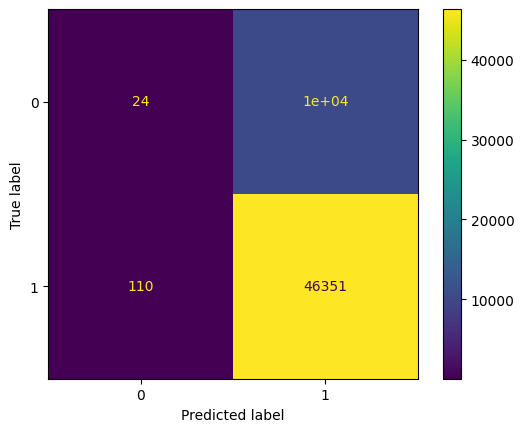

In [126]:
# Creamos la Matriz de Confusión Gráfica
cm = confusion_matrix(y_test,y_test_pred_tree)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_tree.classes_)
disp.plot()
plt.show()

In [127]:
# Precisión
accuracy = accuracy_score(y_test, y_test_pred_tree)
print(f"Precisión del modelo Arbol de Decisión: {accuracy:.6f}")

# Reporte de clasificación
class_report = classification_report(y_test, y_test_pred_tree)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.814297
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.18      0.00      0.00     10490
           1       0.82      1.00      0.90     46461

    accuracy                           0.81     56951
   macro avg       0.50      0.50      0.45     56951
weighted avg       0.70      0.81      0.73     56951



In [ ]:
accuracy_tree = accuracy_score(y_test, y_test_pred_tree)
print(f'La exactitud (accuracy) obtenido es de: {accuracy_tree}')

**OBSERVACIONES**

Se realizaron distintas pruebas y el accuracy daba 100%. Y leyendo como se ha resuelto el árbol de decisión, concluimos que se deben retirar las siguientes variables:
* La variable **"Estado Distribución"** y **"Estado Visita"** muy probablemente se deben retirar del análisis y eso sería lógico, porque al momento que se realice la predicción, el estado de la entrega siempre va a ser **"No Entregada"**
* La variable **"Dias Primera Visita"**. Al principio del análisis el valor de la misma siempre va a ser 0 (cero)
* La variable **"Id Visita 1 Motivo"** al principio, siempre va a ser un valor nulo
* La variable **"Visita 1 Puntual"** al principio, siempre va a ser un 0 (cero = no puntual)

## Ramdom Forest

In [ ]:
# Buscamos la cantidad de árboles óptima
param_grid = {'n_estimators': range(50, 71, 5)}

# Configurar GridSearch
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',  # Cambiar a la métrica que prefieras
    cv=5
)

# Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# Mejor número de estimadores
print(f"Mejor número de estimadores: {grid_search.best_params_['n_estimators']}")


In [ ]:
# Creamos la instancia del modelo
# Se ejecutó varias veces la celda anterior y llegamos a la conclusión de que 65 arboles es el óptimo
clf_forest = RandomForestClassifier(random_state=42, n_estimators=65)

In [ ]:
# Entrenamos el modelo con los datos y la etiqueta
clf_forest.fit(X_train, y_train)

In [ ]:
# Se realiza la predicción con el modelo entrenado
y_test_pred_forest = clf_forest.predict(X_test)

[[  362 10128]
 [ 1630 44831]]


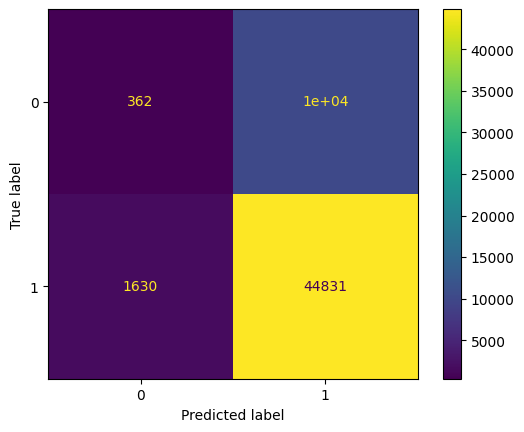

In [128]:
# Creamos la Matriz de Confusión Gráfica
cm = confusion_matrix(y_test,y_test_pred_forest)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_forest.classes_)
disp.plot()
plt.show()

In [129]:
# Precisión
accuracy = accuracy_score(y_test, y_test_pred_forest)
print(f"Precisión del modelo: {accuracy:.6f}")

# Reporte de clasificación
class_report = classification_report(y_test, y_test_pred_forest)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.793542
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.18      0.03      0.06     10490
           1       0.82      0.96      0.88     46461

    accuracy                           0.79     56951
   macro avg       0.50      0.50      0.47     56951
weighted avg       0.70      0.79      0.73     56951



## KNN

In [ ]:
# Ajustar y transformar los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Buscamos el k óptimo
k_values = range(9, 11)
scores = []

for k in k_values:
    print(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())


# Gráfica del desempeño vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Media')
plt.title('Desempeño del Modelo vs Número de Vecinos')
plt.grid(True)
plt.show()

# Mejor valor de k
best_k = k_values[scores.index(max(scores))]
print(f"El mejor valor de k es: {best_k}")

In [ ]:
# Creamos la instancia del modelo
clf_knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
# Entrenamos el modelo con los datos y la etiqueta
clf_knn.fit(X_train_scaled, y_train)

In [ ]:
# Se realiza la predicción con el modelo entrenado
y_test_pred_knn = clf_knn.predict(X_test_scaled)

[[  301 10189]
 [ 1365 45096]]


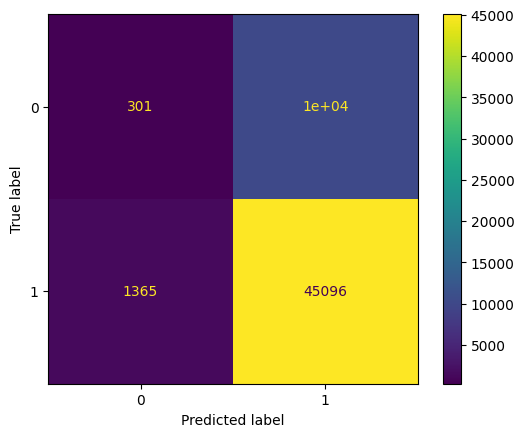

In [130]:
# Creamos la Matriz de Confusión Gráfica
cm = confusion_matrix(y_test,y_test_pred_knn)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_knn.classes_)
disp.plot()
plt.show()

In [131]:
# Precisión
accuracy = accuracy_score(y_test, y_test_pred_knn)
print(f"Precisión del modelo: {accuracy:.6f}")

# Reporte de clasificación
class_report = classification_report(y_test, y_test_pred_knn)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.797124
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.18      0.03      0.05     10490
           1       0.82      0.97      0.89     46461

    accuracy                           0.80     56951
   macro avg       0.50      0.50      0.47     56951
weighted avg       0.70      0.80      0.73     56951



## Regresión Logística


In [ ]:
# Creamos la instancia del modelo
clf_reg_log=LogisticRegression()

In [ ]:
# Entrenamos el modelo con los datos y la etiqueta
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=45)
clf_reg_log.fit(X_train, y_train)

In [ ]:
# Se realiza la predicción con el modelo entrenado
y_test_pred_reg_log = clf_reg_log.predict(X_test)

[[    0 10490]
 [    0 46461]]


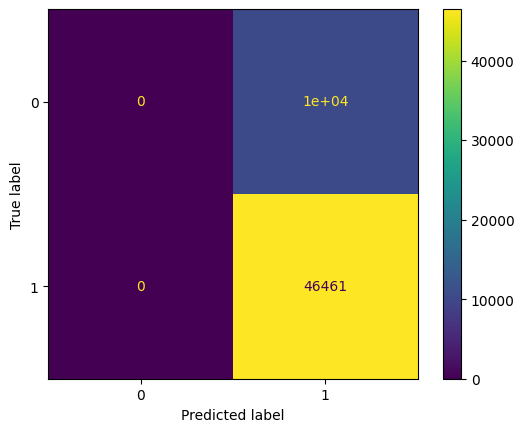

In [132]:
# Creamos la Matriz de Confusión Gráfica
cm = confusion_matrix(y_test,y_test_pred_reg_log)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_reg_log.classes_)
disp.plot()
plt.show()

In [133]:
# Precisión
accuracy = accuracy_score(y_test, y_test_pred_reg_log)
print(f"Precisión del modelo: {accuracy:.6f}")

# Reporte de clasificación
class_report = classification_report(y_test, y_test_pred_reg_log)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 0.815807
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     10490
           1       0.82      1.00      0.90     46461

    accuracy                           0.82     56951
   macro avg       0.41      0.50      0.45     56951
weighted avg       0.67      0.82      0.73     56951



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



# Validación del Modelo

## Metricas Generales

In [152]:
metricas = {
    "Metrica": ["Accuracy", "Precision", "Sensibilidad", "Especificidad", ""],
    "Arbol de Decisión": ["0,814297", "0,179104", "0,002287","0,997632", ""],
    "Random Forest": ["0,793542", "0,181726", "0,034509", "0,964916", ""],
    "KNN": ["0,797124", "0,180672", "0,028693", "0,970620", ""],
    "Regresión Logística": ["0,815807", "N/A", "0,000000", "1,000000", ""],
    "Obsercaciones": ["Exactitud", "Tasa Predictiva Positiva", "Tasa de Verdaderos Positivos", "Tasa de Verdaderos Negativos", ""]
}
df_metricas = pd.DataFrame(metricas)

# Mostrar tabla con estilo en Colab
df_metricas.style.set_properties(**{'font-size': '15px', 'text-align': 'center'})

,Metrica,Arbol de Decisión,Random Forest,KNN,Regresión Logística,Obsercaciones
0,Accuracy,"0,814297","0,793542","0,797124","0,815807",Exactitud
1,Precision,"0,179104","0,181726","0,180672",N/A,Tasa Predictiva Positiva
2,Sensibilidad,"0,002287","0,034509","0,028693","0,000000",Tasa de Verdaderos Positivos
3,Especificidad,"0,997632","0,964916","0,970620","1,000000",Tasa de Verdaderos Negativos
4,,,,,,


# Optimización del Modelo

Se ha implementado en el código **"GridSearchCV"** para encontrar:
* La profundidad óptima del arbol de decisión ha sido igual a 5 (cinco)
* La cantidad de Árboles optima para el método de Random Forest ha sido igual a 65 (sesenta y cinco)
* La cantidad de vecinos óptima para el método KNN ha sido 9 (nueve)

# Ensamble